In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Função de ativação e sua derivada**

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

**Função de custo**

In [3]:
def MSE(Y_target, Y_pred):
    return np.mean((Y_target - Y_pred) ** 2)

**Definindo o dataset**

In [4]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [5]:
Y = np.array([
    [0],
    [1],
    [1],
    [0]
])
Y

array([[0],
       [1],
       [1],
       [0]])

**Taxa de aprendizagem**

In [6]:
N = 0.5

**Quantidade de épocas**

In [7]:
EPOCHS = 10000

**Vetor da função de custo**

In [8]:
cost = np.array([])

**Arquitetura da rede**

In [9]:
n_neurons_input_layer = 2
n_neurons_hidden_layer_1 = 5
n_neurons_hidden_layer_2 = 3
n_neurons_output_layer = 1

**Pesos**

In [10]:
w_hidden_layer_1 = np.random.rand(n_neurons_input_layer, n_neurons_hidden_layer_1)
w_hidden_layer_1

array([[0.80404366, 0.50020454, 0.23877439, 0.22928291, 0.10257064],
       [0.85533791, 0.13918154, 0.44813597, 0.09422481, 0.01276933]])

In [11]:
w_hidden_layer_2 = np.random.rand(n_neurons_hidden_layer_1, n_neurons_hidden_layer_2)
w_hidden_layer_2

array([[0.73315782, 0.05475359, 0.37748327],
       [0.56297387, 0.19811518, 0.40795717],
       [0.43975966, 0.66971547, 0.87886669],
       [0.67653223, 0.79407524, 0.78176296],
       [0.65214463, 0.00963473, 0.4115504 ]])

In [12]:
w_output_layer = np.random.rand(n_neurons_hidden_layer_2, n_neurons_output_layer)
w_output_layer

array([[0.21566371],
       [0.46333035],
       [0.27086885]])

**Vieses**

In [13]:
b_hidden_layer_1 = np.zeros(n_neurons_hidden_layer_1)
b_hidden_layer_1

array([0., 0., 0., 0., 0.])

In [14]:
b_hidden_layer_2 = np.zeros(n_neurons_hidden_layer_2)
b_hidden_layer_2

array([0., 0., 0.])

In [15]:
b_output_layer = np.zeros(n_neurons_output_layer)
b_output_layer

array([0.])

**Treino da rede**

In [16]:
for epoch in range(EPOCHS):
    activation_hidden_layer_1 = sigmoid(np.dot(X, w_hidden_layer_1) + b_hidden_layer_1)
    activation_hidden_layer_2 = sigmoid(np.dot(activation_hidden_layer_1, w_hidden_layer_2) + b_hidden_layer_2)
    activation_output_layer = sigmoid(np.dot(activation_hidden_layer_2, w_output_layer) + b_output_layer)
    
    cost = np.append(cost, MSE(Y, activation_output_layer))
    
    delta_output_layer = (Y - activation_output_layer) * sigmoid_derivative(activation_output_layer)
    delta_hidden_layer_2 = np.dot(delta_output_layer, w_output_layer.T) * sigmoid_derivative(activation_hidden_layer_2)
    delta_hidden_layer_1 = np.dot(delta_hidden_layer_2, w_hidden_layer_2.T) * sigmoid_derivative(activation_hidden_layer_1)
    
    w_output_layer += N * np.dot(activation_hidden_layer_2.T, delta_output_layer)
    w_hidden_layer_2 += N * np.dot(activation_hidden_layer_1.T, delta_hidden_layer_2)
    w_hidden_layer_1 += N * np.dot(X.T, delta_hidden_layer_1)

**Gráfico da função de custo**

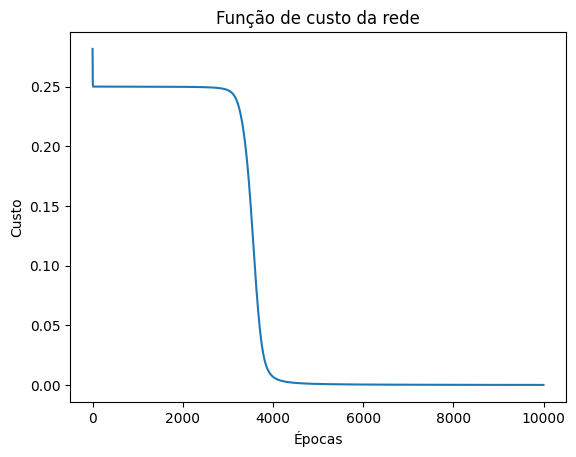

In [17]:
plt.plot(cost)
plt.title('Função de custo da rede')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()